### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN  

GRU  

LSTM  

ConvLSTM2D### 

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
print('make_features')

make_features


In [3]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [4]:
print('--------LSTM-----------')

--------LSTM-----------


In [5]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 185s 7ms/step - loss: 0.4604 - accuracy: 0.7833 - val_loss: 0.3938 - val_accuracy: 0.8284
Epoch 2/3
25000/25000 [==============================] - 189s 8ms/step - loss: 0.3005 - accuracy: 0.8781 - val_loss: 0.3868 - val_accuracy: 0.8285
Epoch 3/3
25000/25000 [==============================] - 33s 1ms/step
Test score: 0.4093542471408844
Test accuracy: 0.8307200074195862


In [6]:
print('---------SimpleRNN----------')

---------SimpleRNN----------


In [7]:
from keras.layers import SimpleRNN

In [8]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 80s 3ms/step - loss: 0.6893 - accuracy: 0.5368 - val_loss: 0.6519 - val_accuracy: 0.5968
Epoch 2/3
25000/25000 [==============================] - 84s 3ms/step - loss: 0.5552 - accuracy: 0.7163 - val_loss: 0.5712 - val_accuracy: 0.6974
Epoch 3/3
25000/25000 [==============================] - 7s 281us/step
Test score: 0.5547346735286712
Test accuracy: 0.7147200107574463


In [9]:
print('---------GRU----------')

---------GRU----------


In [10]:
from keras.layers import GRU

In [11]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 141s 6ms/step - loss: 1.6911 - accuracy: 0.7550 - val_loss: 0.5314 - val_accuracy: 0.7413
Epoch 2/3
25000/25000 [==============================] - 138s 6ms/step - loss: 0.3909 - accuracy: 0.8495 - val_loss: 0.5416 - val_accuracy: 0.7191
Epoch 3/3
25000/25000 [==============================] - 21s 821us/step
Test score: 0.5301564646625518
Test accuracy: 0.7301200032234192


In [12]:
print('---------ConvLSTM2----------')

---------ConvLSTM2----------


Loading data...　　
25000 train sequences　　
25000 test sequences　　
Pad sequences (samples x time)　　
x_train shape: (25000, 80)　　
x_test shape: (25000, 80)　　
Build model...　　
Train...　　
/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting　　
sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.　　
"Converting sparse IndexedSlices to a dense Tensor of unknown shape. "　　
Train on 25000 samples, validate on 25000 samples　　　　
Epoch 1/3　　　　
25000/25000 [==============================] - 176s 7ms/step - loss: 0.4574 - accuracy: 0.7839 - val_loss: 0.3711　　　　　　　
val_accuracy: 0.8327　　
Epoch 2/3　　
25000/25000 [==============================] - 173s 7ms/step - loss: 0.2957 - accuracy: 0.8767 - val_loss: 0.3770　　
val_accuracy: 0.8344　　
Epoch 3/3　　
25000/25000 [==============================] - 160s 6ms/step - loss: 0.2122 - accuracy: 0.9192 - val_loss: 0.4134　　
val_accuracy: 0.8302　　
25000/25000 [==============================] - 26s 1ms/step　　
Test score: 0.4133569652080536　　
Test accuracy: 0.8302000164985657

In [13]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

In [14]:
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

Train on 95 samples, validate on 5 samples
Epoch 1/2
95/95 [==============================] - 176s 2s/step - loss: 0.4278 - val_loss: 0.6317
Epoch 2/2
95/95 [==============================] - 167s 2s/step - loss: 0.2924 - val_loss: 0.5903


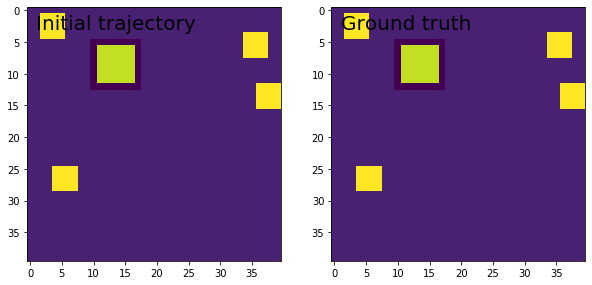

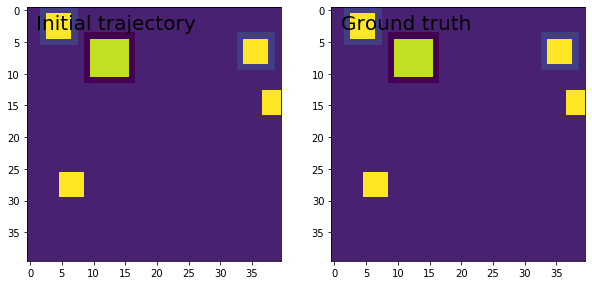

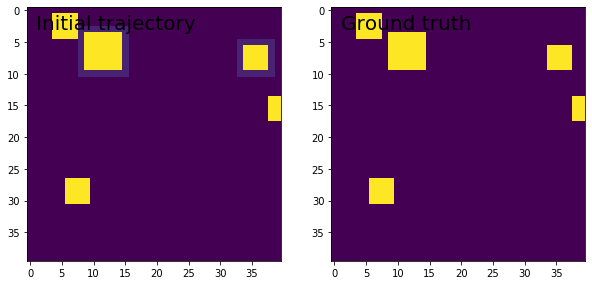

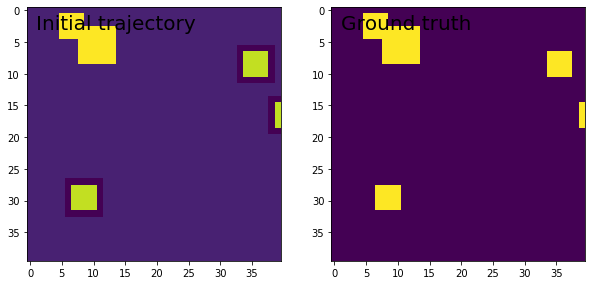

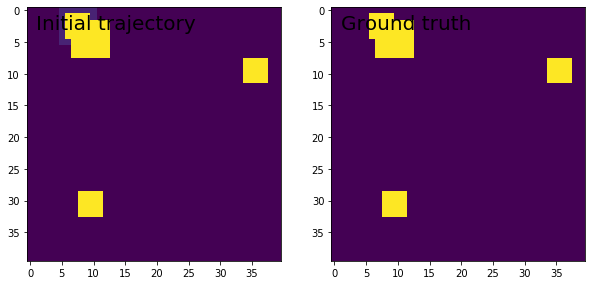

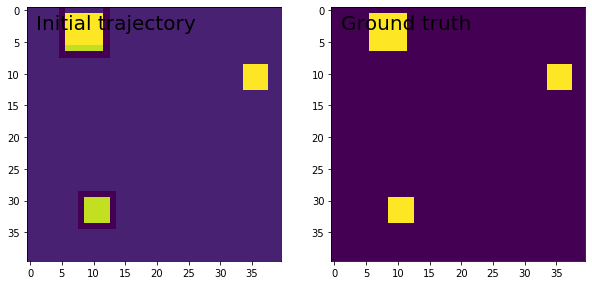

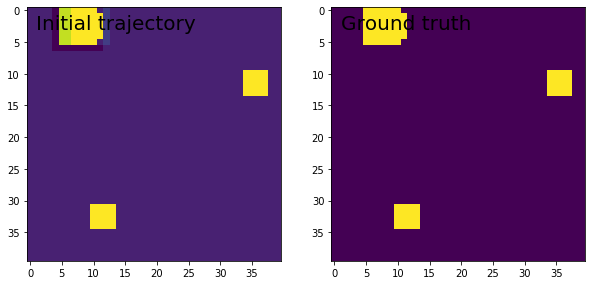

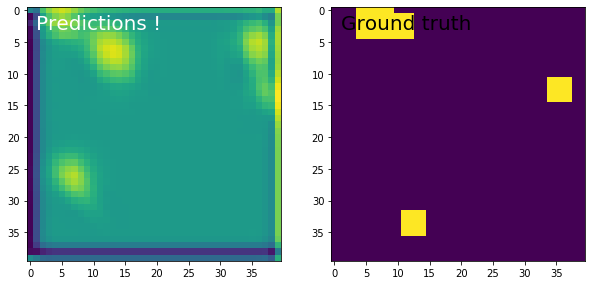

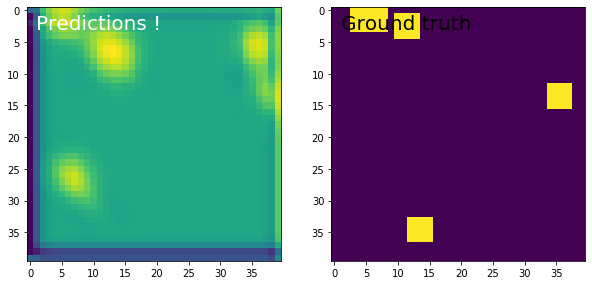

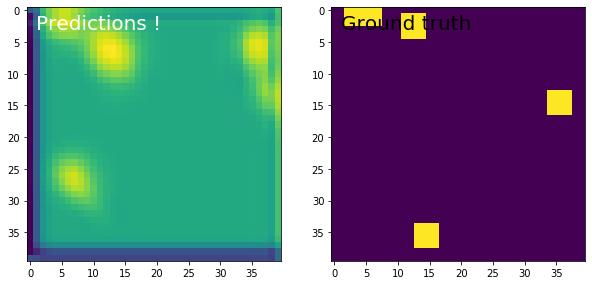

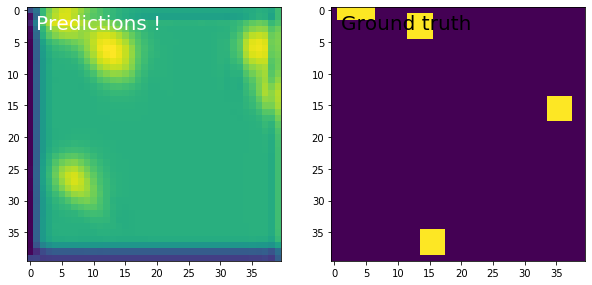

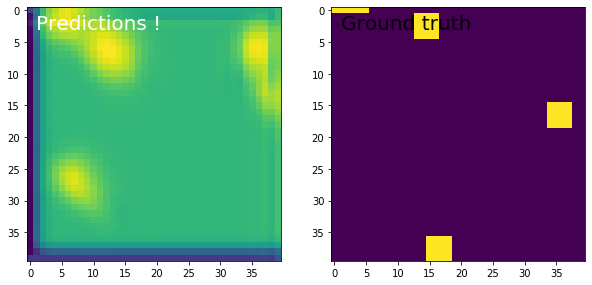

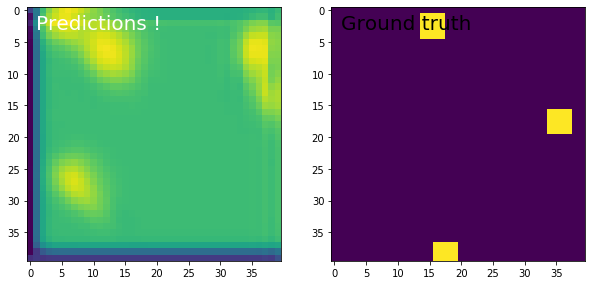

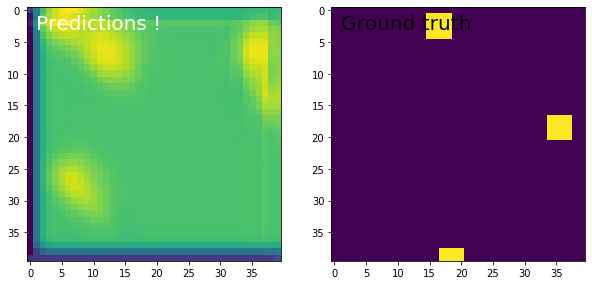

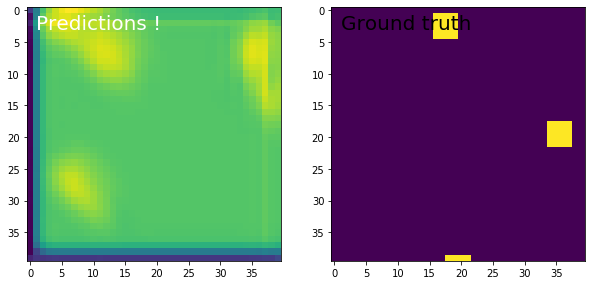

In [16]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=100)
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 12
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

In [26]:
# ls

### SimpleRNN
Simple Recurrent Network(単純再帰型ネットワーク)は、提案者の名前から通称Elman/Jordan netと呼ばれるRNNの一種です。  
Simple RNNは閉路上にコンテキスト（文脈）を持つ構造をしています。　　  
隠れ層が隠れ層自身に接続して、ある時点での状態を次の状態の入力値として使うことができます。　　  
つまり、適切に訓練さえされていれば、時間的な情報を受け渡すことができます。

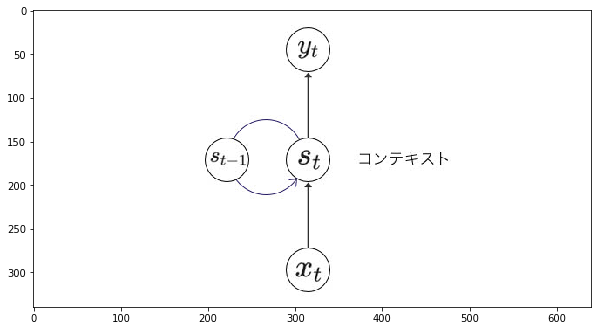

In [20]:
img = plt.imread('loop-simple_rnn.jpg')
plt.figure(figsize = (10,15))
plt.imshow(img)

### LSTM
Simple RNNでも理論上は上手くいきますが、現実的にはかなり前の古い情報を考慮するようには学習されませんでした。他のDeep Neural Networksと同様に、勾配消失の問題に直面したからです。
LSTMは、従来のRNNセルでは長期依存が必要なタスクを学習することができなかった問題を解決したモデルです。  
LSTMの画期的な特徴は、「ゲート」と呼ばれる情報の取捨選択機構を持った点です。   
各ゲートでの情報の取捨選択は、シグモイド関数で行われます。  
出力が0であれば、ゲートを通さず、1であれば全て通します。  
仮に忘却ゲートを1にして、入力ゲートを0にすると、状態は永久に保持され続けます。  
実際の問題の文脈に応じて変更していく必要があります。
忘却ゲートのおかげで、言語モデルの例では、「彼は…」と続く文が終わったときに、  
主語が彼であるという状態を忘れるといったことができるようになります。  
時系列データでは季節の変わり目や日付の変更に対応できることもあるでしょう。

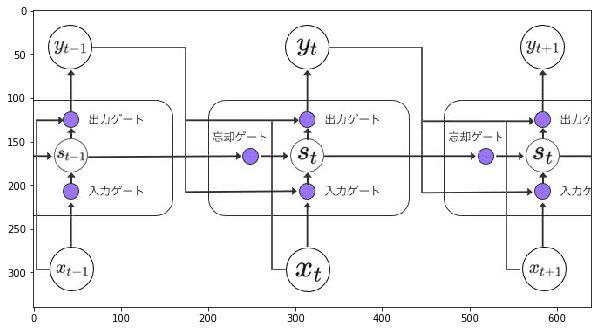

In [22]:
img = plt.imread('loop-lstm-rnn.jpg')
plt.figure(figsize = (10,15))
plt.imshow(img)

### GRU
Gated Recurrent Unit(GRU)は、LSTMをもう少しシンプルにしたモデルです。入力ゲートと忘却ゲートを「更新ゲート」として１つのゲートに統合しています。LSTMと同様に、このような忘却・更新ゲートを導入することで、長いステップ前の出来事の特徴の記憶を維持しやすくなります。なぜなら、各時間ステップ間を迂回するショートカットパスが効率的に生成されると言えるからです。そのおかげで、学習中に誤差を容易に逆伝播することができ、勾配消失の問題を軽減することになります。

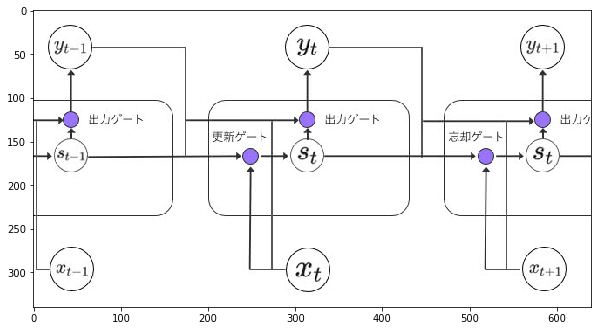

In [25]:
img = plt.imread('loop-gru.jpg')
plt.figure(figsize = (10,15))
plt.imshow(img)

### その他
StackedRNNCells  
RNNにさらに層を追加して深くしたモデル。より精度を出したいときに使われる。

CuDNNGRU   
GRUの層を深くして、GPUでの使用を想定したモデル。

CuDNNLSTM  
LSTMの層を深くして、GPUでの使用を想定したモデル。